In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])

df_cluster1 = pd.read_csv("../files/experiment_1/metrics_embl_inference_cluster_exp1_2cpu_3ram_30nodes.csv")
df_cluster2 = pd.read_csv("../files/experiment_1/metrics_embl_inference_cluster_exp1_3cpu_5ram_20nodes.csv")
df_cluster3 = pd.read_csv("../files/experiment_1/metrics_embl_inference_cluster_exp1_6cpu_10ram_10nodes.csv")

df_cluster1['Cluster'] = '2CPU 3RAM 30 nodes'
df_cluster2['Cluster'] = '3CPU 5RAM 20 nodes'
df_cluster3['Cluster'] = '6CPU 10RAM 10 nodes'

cluster_palette = {
    '2CPU 3RAM 30 nodes': 'palegreen',
    '3CPU 5RAM 20 nodes': 'salmon',
    '6CPU 10RAM 10 nodes': 'skyblue'
}

df_combined = pd.concat([df_cluster1, df_cluster2, df_cluster3], ignore_index=True)

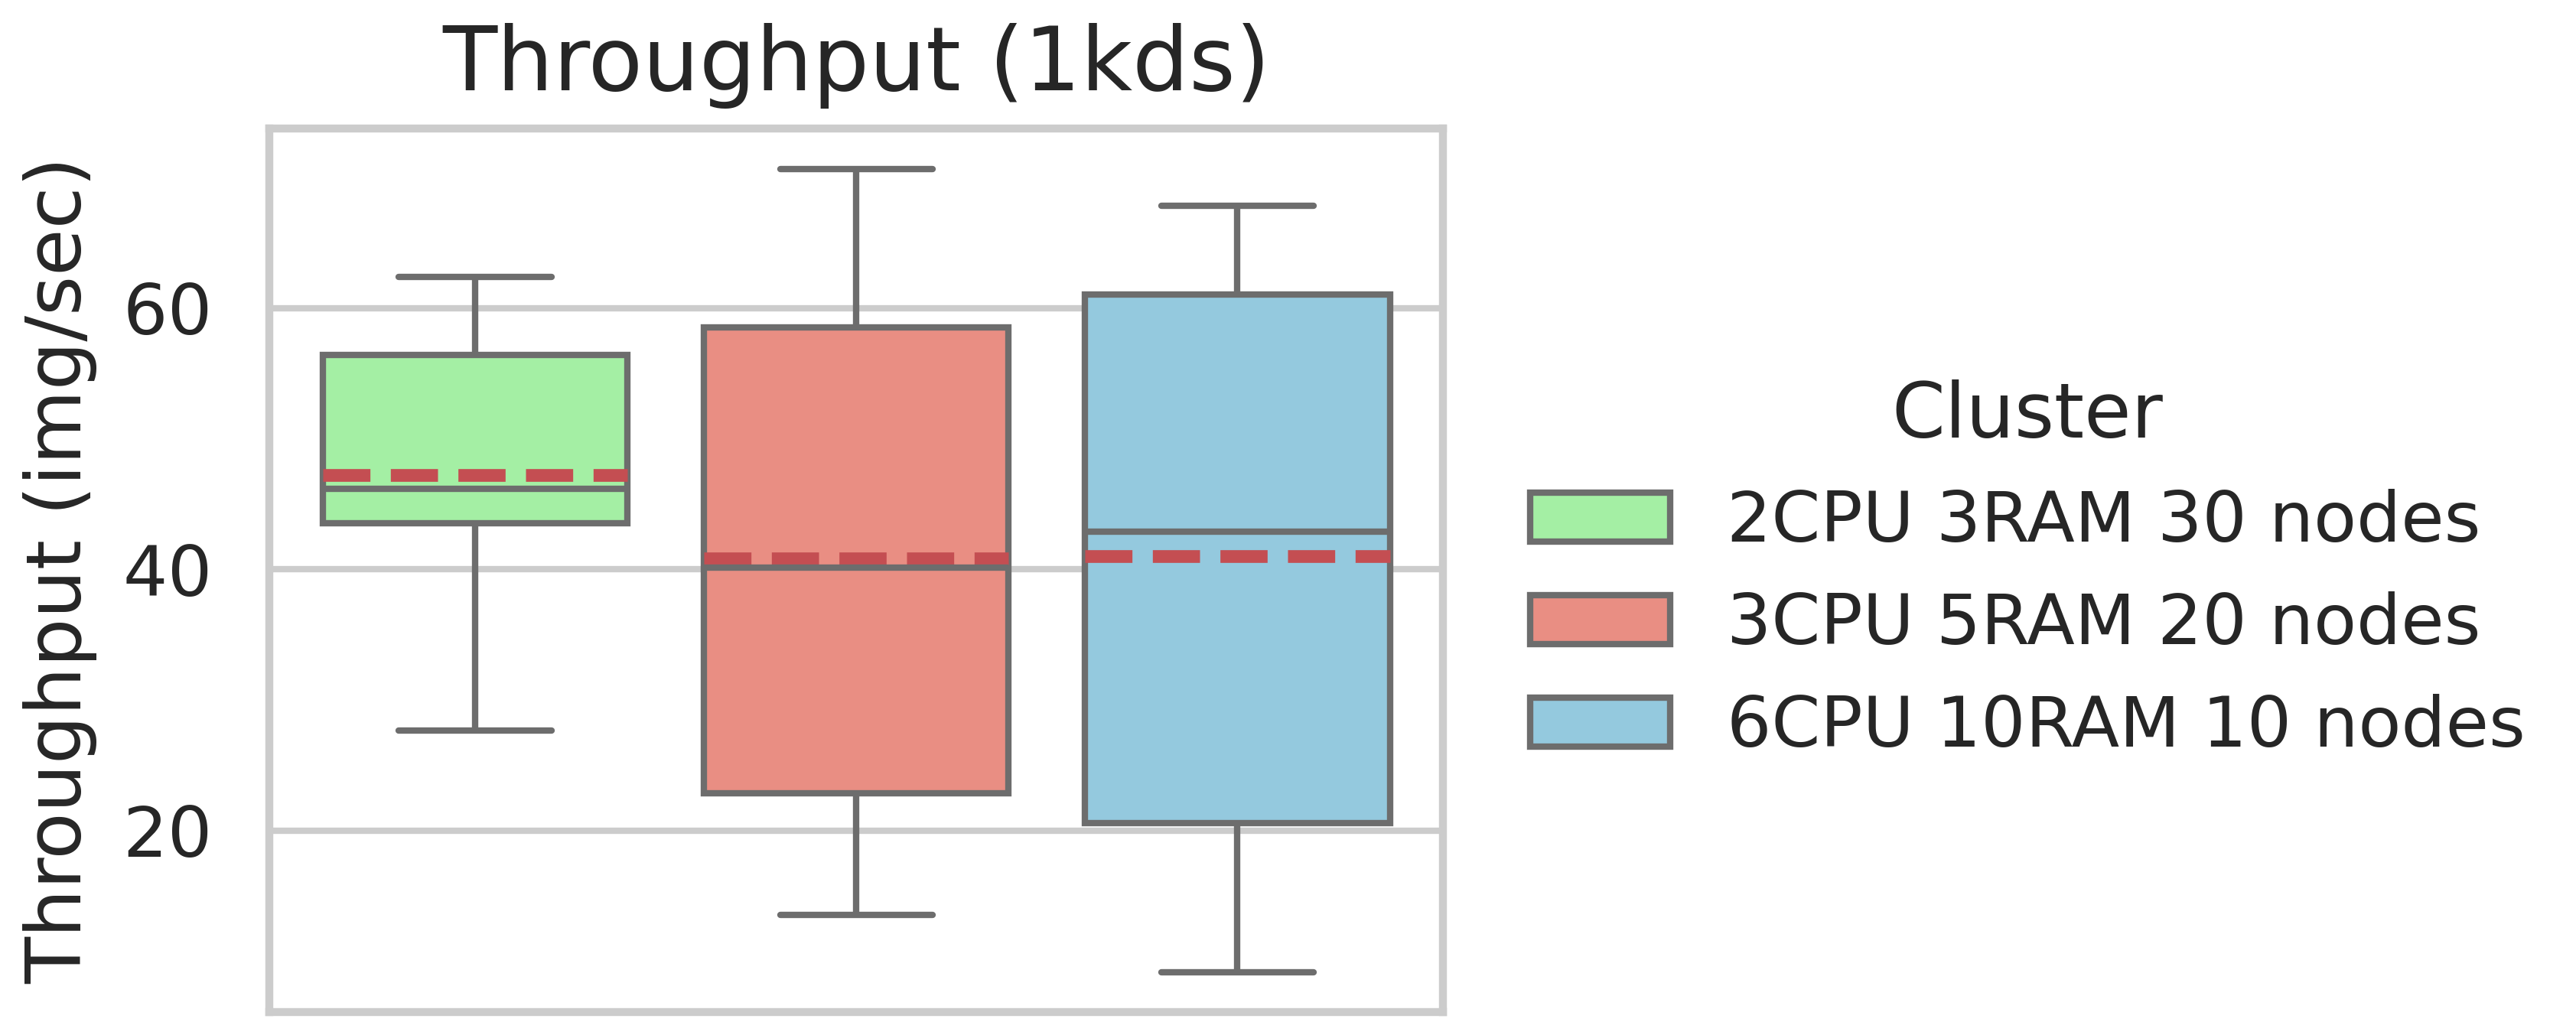

In [8]:
ds1k = df_combined[df_combined['Dataset'] == '1kds']
mean_throughput = ds1k.groupby('Cluster')['Throughput (img/sec)'].mean().reset_index()
mean_throughput.columns = ['Cluster', 'Mean Throughput']
plt.figure()
sns.set(style="whitegrid")
sns.boxplot(x='Cluster', y='Throughput (img/sec)', hue='Cluster', data=ds1k, palette=cluster_palette, legend=True)
for i, row in mean_throughput.iterrows():
    plt.plot([i - 0.4, i + 0.4], [row['Mean Throughput'], row['Mean Throughput']], 'r--', lw=2)
plt.title('Throughput (1kds)', fontsize=14)
plt.xlabel('')
plt.ylabel('Throughput (img/sec)')
plt.xticks([])
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
plt.show()

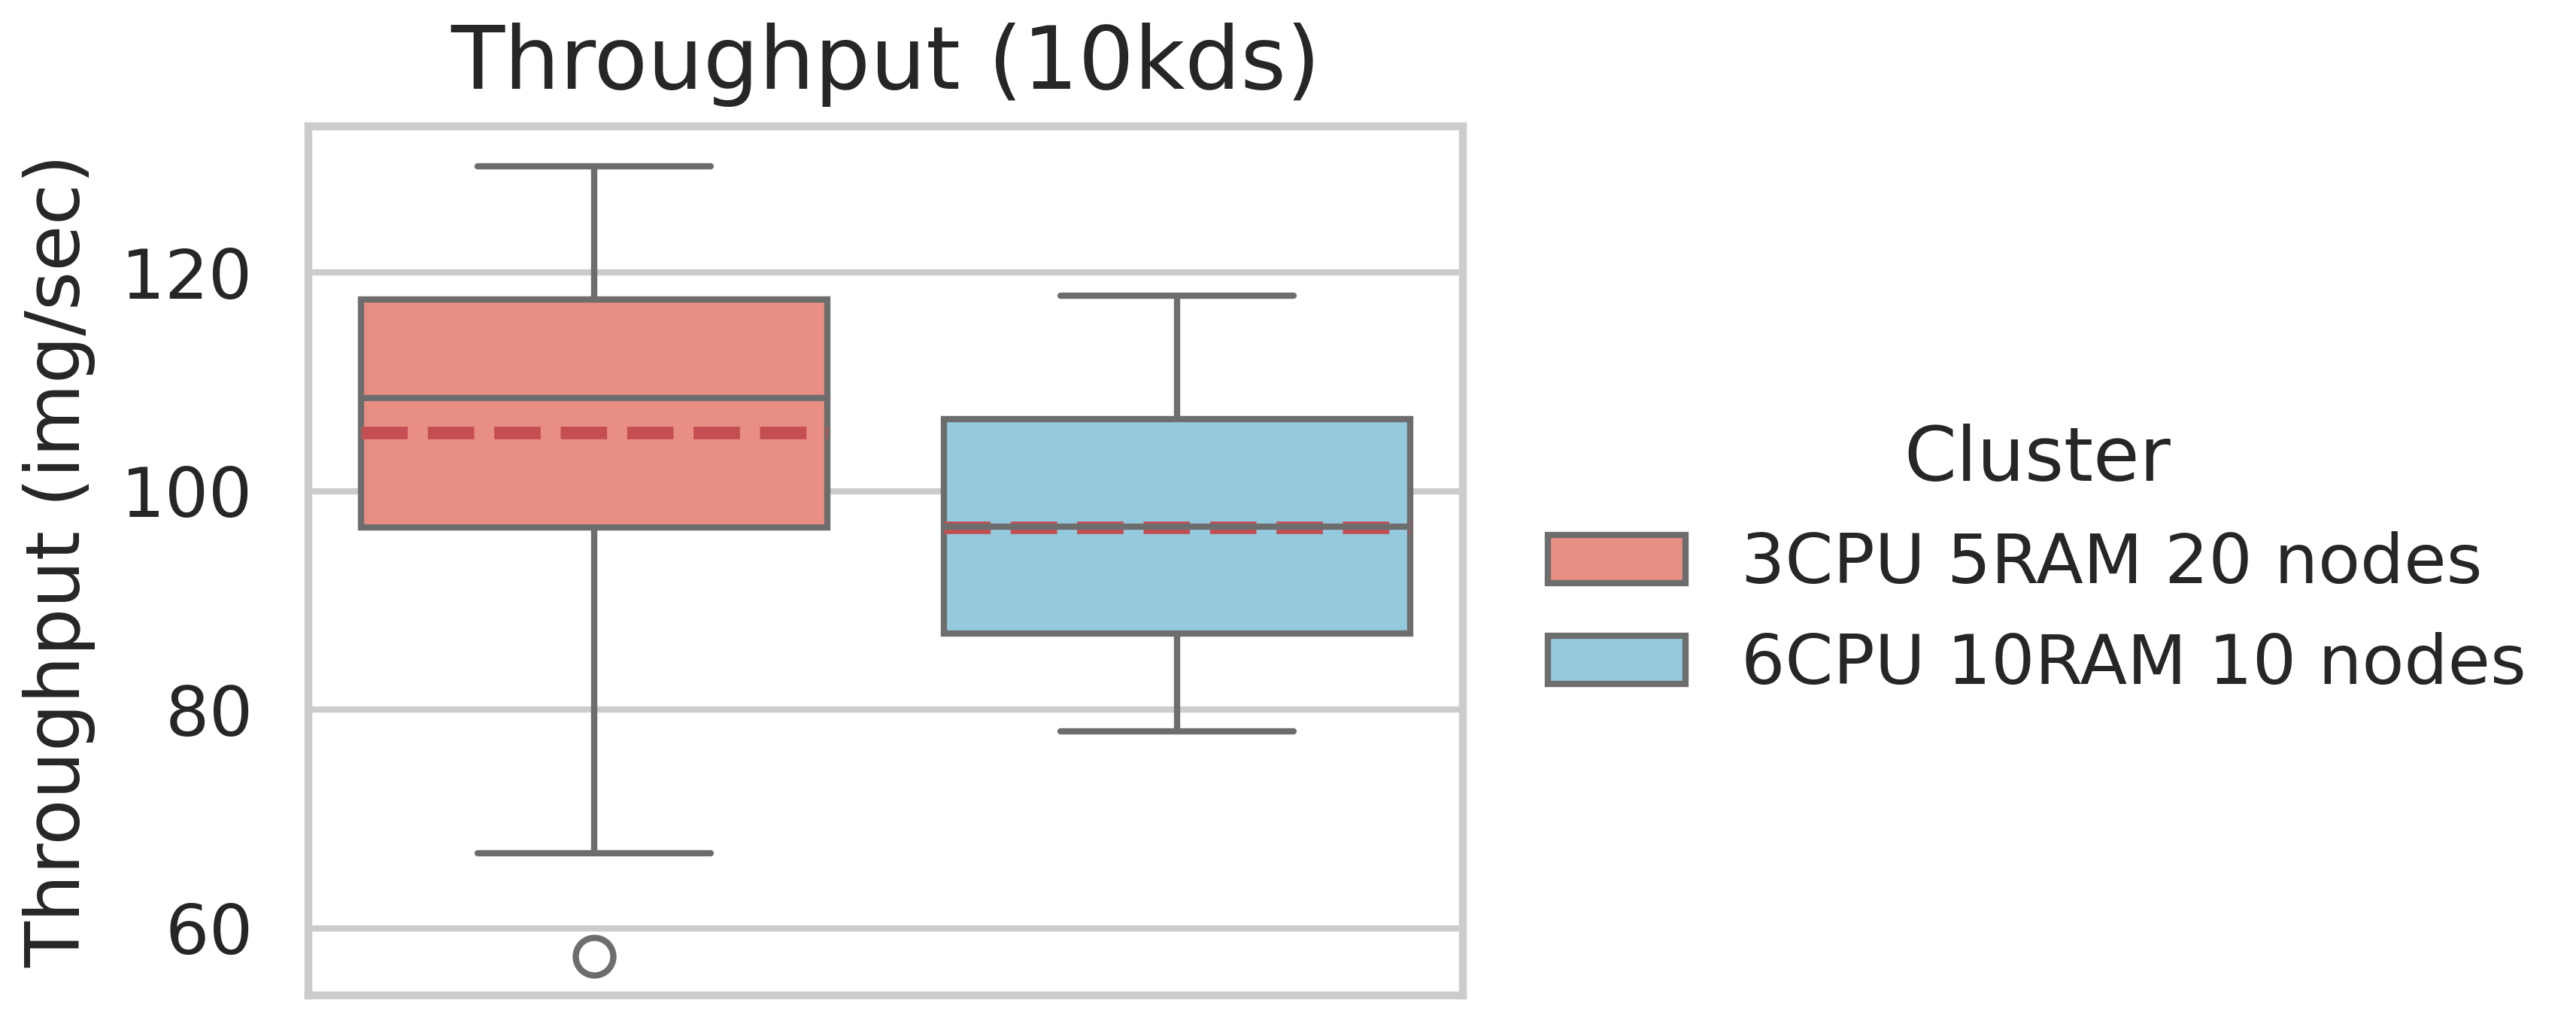

In [9]:
ds10k = df_combined[df_combined['Dataset'] == '10kds']
mean_throughput = ds10k.groupby('Cluster')['Throughput (img/sec)'].mean().reset_index()
mean_throughput.columns = ['Cluster', 'Mean Throughput']
plt.figure()
sns.set(style="whitegrid")
sns.boxplot(x='Cluster', y='Throughput (img/sec)', hue='Cluster', data=ds10k, palette=cluster_palette, legend=True)
for i, row in mean_throughput.iterrows():
    plt.plot([i - 0.4, i + 0.4], [row['Mean Throughput'], row['Mean Throughput']], 'r--', lw=2)   
plt.title('Throughput (10kds)', fontsize=14)
plt.xlabel('')
plt.ylabel('Throughput (img/sec)')
plt.xticks([])
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
plt.show()